# This is Estelle's notebook no.2

In [206]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
import cv2
# import pytesseract

import requests
from bs4 import BeautifulSoup
import httpx

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [208]:
from PIL import Image
from io import BytesIO

In [209]:
from pokedex.utils import reduce_dataset

## Load data and pre-process

In [157]:
setinfo = np.array(
        [['dv1', '21', 'Dragon Vault', 'right'],
         ['swsh9', '186', 'Brilliant Stars', 'left'],
         ['swsh45', '73', 'Shining Fates', 'left'],
         ['swsh6', '233', 'Chilling Reign', 'left'],
         ['swsh12pt5', '160', 'Crown Zenith', 'left'],
         ['xy1', '146', 'XY', 'right'],
         ['xy2', '110', 'Flashfire', 'right'],
         ['xy3', '114', 'Furious Fists', 'right'],
         ['g1', '117', 'Generations', 'right'],
         ['xy4', '124', 'Phantom Forces', 'right'],
         ['xy6', '112', 'Roaring Skies', 'right'],
         ['xy7', '100', 'Ancient Origins', 'right'],
         ['dp1', '130', 'Diamond & Pearl', 'right'],
         ['dp2', '124', 'Mysterious Treasures', 'right'],
         ['sm4', '126', 'Crimson Invasion', 'left'],
         ['swsh10', '216', 'Astral Radiance', 'left'],
         ['sv4', '266', 'Paradox Rift', 'left'],
         ['sv3pt5', '207', '151', 'left'],
         ['sv3', '230', 'Obsidian Flames', 'left'],
         ['sv2', '279', 'Paldea Evolved', 'left']])

In [80]:
df = pd.read_json('../raw_data/dict_dataset_full.json')

In [81]:
df['corner']=[np.array(v) for v in df['corner']]

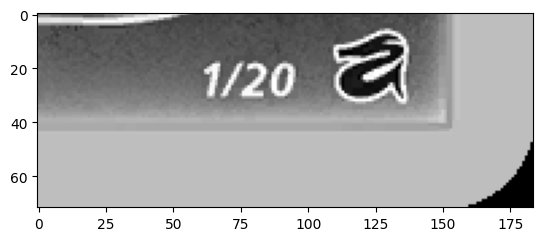

In [82]:
plt.imshow(df.loc[0,'corner'], cmap='grey')

In [195]:
setinfo_left = setinfo[setinfo[:,3] == 'left']
setinfo_right = setinfo[setinfo[:,3] == 'right']

In [283]:
set_list = setinfo_right[:,0]
set_list = np.append(set_list, 'no') 
# set_list[-1] = 'no'
set_list

array(['dv1', 'xy1', 'xy2', 'xy3', 'g1', 'xy4', 'xy6', 'xy7', 'dp1',
       'dp2', 'no'], dtype='<U20')

In [306]:
nb_cards = np.array([sum((df['set_id'] == set_list[i]) & (df['position'] == 'right')) for i in range(set_list.shape[0])])

set_to_dropcards = np.vstack((set_list[nb_cards > 150], nb_cards[nb_cards > 150]))
set_to_dropcards

array([['no'],
       ['1974']], dtype='<U21')

In [311]:
df_small = pd.DataFrame()

for i in range(set_to_dropcards.shape[1]):
    idx = np.random.randint(0, high=int(set_to_dropcards[1,i]), size=150, dtype=int)
    # df_small = df[df['set_id'] == set_to_dropcards[0,i]].iloc[idx]
    df_small = pd.concat([ df_small, df[(df['set_id'] == set_to_dropcards[0,i]) & (df['position'] == 'right')].iloc[idx] ], axis=0, ignore_index=True)


In [318]:
for i in range(len(set_list[nb_cards <= 150])):
    df_small = pd.concat([ df_small, df[df['set_id'] == set_list[nb_cards <= 150][i]] ], axis=0, ignore_index=True)

In [317]:
df_small

,corner,position,set_id,set_name
0,"[[145, 145, 145, 145, 145, 145, 145, 145, 145,...",right,no,no
1,"[[154, 154, 154, 154, 154, 154, 154, 154, 154,...",right,no,no
2,"[[191, 191, 191, 191, 191, 191, 191, 191, 191,...",right,no,no
3,"[[154, 154, 154, 154, 154, 154, 154, 154, 154,...",right,no,no
4,"[[154, 154, 154, 154, 154, 154, 154, 154, 154,...",right,no,no
...,...,...,...,...
1203,"[[198, 198, 198, 199, 199, 200, 200, 200, 202,...",right,dp2,Mysterious Treasures
1204,"[[156, 155, 156, 157, 153, 145, 138, 135, 127,...",right,dp2,Mysterious Treasures
1205,"[[130, 129, 126, 121, 115, 110, 109, 109, 105,...",right,dp2,Mysterious Treasures
1206,"[[133, 121, 126, 120, 119, 121, 107, 110, 91, ...",right,dp2,Mysterious Treasures


In [319]:
reduce_dataset('../raw_data/dict_dataset_full.json')

In [322]:
df_right = pd.read_json('../raw_data/dict_reduceddataset_right.json')
df_left = pd.read_json('../raw_data/dict_reduceddataset_left.json')

In [328]:
df_left

,corner,position,set_id,set_name
0,"[[65, 49, 124, 124, 86, 42, 71, 71, 71, 23, 96...",left,swsh9,Brilliant Stars
1,"[[49, 84, 146, 209, 209, 203, 203, 203, 203, 1...",left,swsh9,Brilliant Stars
2,"[[171, 172, 172, 142, 82, 7, 61, 115, 170, 172...",left,swsh9,Brilliant Stars
3,"[[176, 174, 174, 174, 174, 174, 174, 174, 174,...",left,swsh9,Brilliant Stars
4,"[[189, 198, 205, 198, 205, 194, 194, 186, 186,...",left,swsh9,Brilliant Stars
...,...,...,...,...
1542,"[[214, 213, 210, 210, 210, 208, 208, 208, 206,...",left,sm4,Crimson Invasion
1543,"[[210, 214, 207, 205, 207, 208, 206, 205, 205,...",left,sm4,Crimson Invasion
1544,"[[214, 214, 214, 214, 214, 214, 214, 214, 214,...",left,sm4,Crimson Invasion
1545,"[[214, 214, 214, 214, 214, 214, 214, 214, 214,...",left,sm4,Crimson Invasion


### Split data into train and validation

In [331]:
df_right.shape

(1208, 4)

In [332]:
nb_split = int(df_right.shape[0]*0.8)
nb_split

966

In [333]:
df_train = df_right.iloc[:nb_split]
df_val = df_right.iloc[nb_split:]

In [90]:
df_val.shape[0]+df_train.shape[0]

6064

In [95]:
X_train = df_train.loc[:,'corner']
X_train[0].shape

(72, 184)

In [92]:
XX_train = np.empty((nb_split, 72, 184))

for i, x in enumerate(X_train):
    # print(type(x))
    XX_train[i,:,:] = x

XX_train

ValueError: could not broadcast input array from shape (58,150) into shape (72,184)

(4851,)


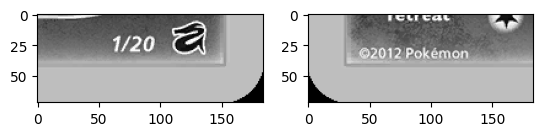

In [93]:
print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");

In [28]:
y_train = df_train.loc[:,'set_id']
y_train

0           no
1          dv1
2           no
3          dv1
4           no
         ...  
3819        no
3820    swsh10
3821        no
3822    swsh10
3823        no
Name: set_id, Length: 3824, dtype: object

### Target encoding

## Model baseline

In [ ]:
# ——— CNN Version III:

# - Integrate Preprocessing Layers
# - Add Regularization

model_pipe = Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.experimental.preprocessing.Rescaling(scale=1./255.),
    layers.Conv2D(16, (3,3), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(32, (2,2), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model_pipe.compile(loss='sparse_categorical_crossentropy', # No need to OHE target
                   optimizer='adam',
                   metrics=['accuracy'])
model_pipe.fit(X_train_raw, y_train_raw,
               epochs=1, # Use early stopping in practice
               batch_size=32,
               verbose=1)